# Fire resistance classification

## Library loading, settings and dataset load

Hide warnings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time

Additional libraries

In [3]:
from feature_selector import FeatureSelector as feat_selec
from autofeatselect import FeatureSelector
from autofeatselect import AutoFeatureSelect
from sklearn.utils import resample

Load Fire Resistance dataset

In [4]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [5]:
df = pd.read_excel(path+'FR original.xlsx')

In [6]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag
0,2.0,35.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,15.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.5,26.0,99.5,NaN,NaN,NaN,0.5,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,15.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,110.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Thickness                        34 non-null     float64
 1   t180                             34 non-null     float64
 2   Gypsum                           24 non-null     float64
 3   Lomas ash                        4 non-null      float64
 4   Vermiculite                      10 non-null     float64
 5   Fiberglass                       18 non-null     float64
 6   PP Fiber                         2 non-null      float64
 7   Fireproof cardboard              2 non-null      float64
 8   Carbonated ash                   1 non-null      float64
 9   Rice husk ash                    1 non-null      float64
 10  GSA ash                          2 non-null      float64
 11  Ash                              4 non-null      float64
 12  Cyclon ash              

In [8]:
df.fillna(value = 0, inplace = True)

In [9]:
df['Fireproof cardboard'] = pd.Categorical(df['Fireproof cardboard'])

In [10]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag
0,2.0,35.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.5,26.0,99.5,0.0,0.0,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,110.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Changing to classification

In [11]:
def assign_rf(value):
    if value < 15:
        return 'Not meet'
    if 15 <= value < 30:
        return 'FRR-15'
    elif 30 <= value < 45:
        return 'FRR-30'
    elif 45 <= value < 60:
        return 'FRR-45'
    elif 60 <= value < 90:
        return 'FRR-60'
    elif 90 <= value < 120:
        return 'FRR-90'
    elif 120 <= value < 240:
        return 'FRR-120'
    else:
        return None

In [12]:
df['FRR'] = df['t180'].apply(assign_rf)

In [13]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag,FRR
0,2.0,35.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-30
1,2.0,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
2,1.5,26.0,99.5,0.0,0.0,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
3,1.5,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
4,4.0,110.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-90


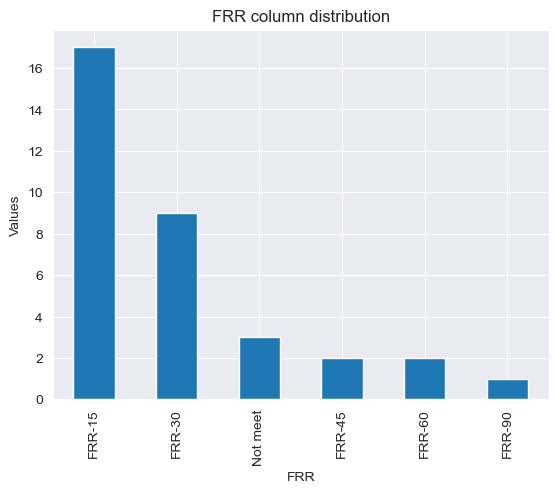

In [14]:
rf_counts = df['FRR'].value_counts()

rf_counts.plot(kind='bar')

plt.title('FRR column distribution')
plt.xlabel('FRR')
plt.ylabel('Values')

plt.show()

Oversampling

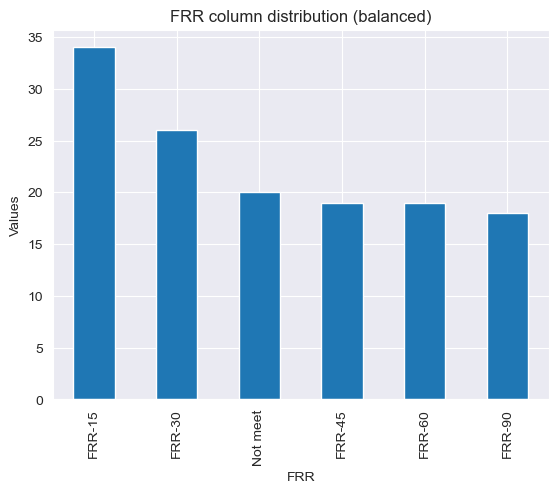

In [15]:
rf_counts = df['FRR'].value_counts()

max_count = rf_counts.max()

dfs = [df]
for category in rf_counts.index:
    df_category = df[df['FRR'] == category]
    df_category_upsampled = resample(df_category, 
                                     replace=True,   
                                     n_samples=max_count,  
                                     random_state=42)  
    dfs.append(df_category_upsampled)

df_balanced = pd.concat(dfs)

rf_balanced_counts = df_balanced['FRR'].value_counts()

rf_balanced_counts.plot(kind='bar')

plt.title('FRR column distribution (balanced)')
plt.xlabel('FRR')
plt.ylabel('Values')

plt.show()

## Features and target split

In [16]:
cat_feat = []
bin_feat = ['Fireproof cardboard']
target = 'FRR'
exc = 't180'
exclude = cat_feat + bin_feat + [target] + [exc]
num_feat = [col for col in df_balanced.columns if col not in exclude]

In [17]:
df_fs = df_balanced.drop(columns = target)
df_fs = df_fs.drop(columns = exc)
df_target = df_balanced[target]

In [18]:
df_fs.reset_index(drop = True, inplace = True)
df_target.reset_index(drop = True, inplace = True)

In [19]:
fs = feat_selec(data = df_fs , labels = df_target)

In [20]:
fs.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



In [21]:
fs.identify_single_unique()

0 features with a single unique value.



In [22]:
single_unique = fs.ops['single_unique']
single_unique

[]

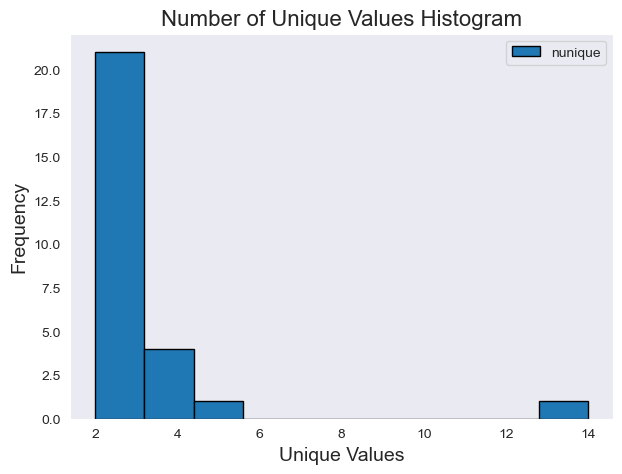

In [23]:
fs.plot_unique()

In [24]:
fs.unique_stats.sample(10)

,nunique
Cyclon ash,2
Coarse silica arid,4
Zeolitized ash,4
Silica gravel,2
Silica fume,3
Coal Fly Ash,3
Carbonated ash,2
Lomas ash,3
Bagasse ash,3
Fireproof cardboard,2


In [25]:
fs.identify_collinear(correlation_threshold=0.9, one_hot = False)

3 features with a correlation magnitude greater than 0.90.



In [26]:
correlated_features = fs.ops['collinear']

In [27]:
correlated_features

['Fireproof cardboard', 'Rice husk ash', 'Silica fume']

In [28]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Fireproof cardboard,PP Fiber,1.000000
1,Rice husk ash,Carbonated ash,1.000000
2,Silica fume,Zeolitized ash,0.953078


In [29]:
df_fs = fs.remove(methods = ['collinear'], keep_one_hot = False)

Data has not been one-hot encoded
Removed 3 features including one-hot features.


In [30]:
df_fs.shape

(136, 24)

In [31]:
cat_feat = []
bin_feat = []
target = 'FRR'
drop = ['Rice husk ash', 'Silica fume', 'Fireproof cardboard']
exc = 't180'
exclude = cat_feat + bin_feat + [target] + drop + [exc]
num_feat = [col for col in df_balanced.columns if col not in exclude]

In [32]:
df_fs.head()

,Thickness,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Carbonated ash,GSA ash,Ash,Cyclon ash,...,Coarse silica arid,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Hidromag
0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.5,99.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_target = df_target.astype('category')

In [34]:
df_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 136 entries, 0 to 135
Series name: FRR
Non-Null Count  Dtype   
--------------  -----   
136 non-null    category
dtypes: category(1)
memory usage: 484.0 bytes


In [35]:
map_dict = {'Not meet': 0, 'FRR-15': 1, 'FRR-30': 2, 'FRR-45': 3, 'FRR-60': 4, 'FRR-90': 5}

In [36]:
df_target = df_target.map(map_dict)

In [37]:
df_target.head()

0    2
1    1
2    1
3    1
4    5
Name: FRR, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 0]

In [38]:
feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

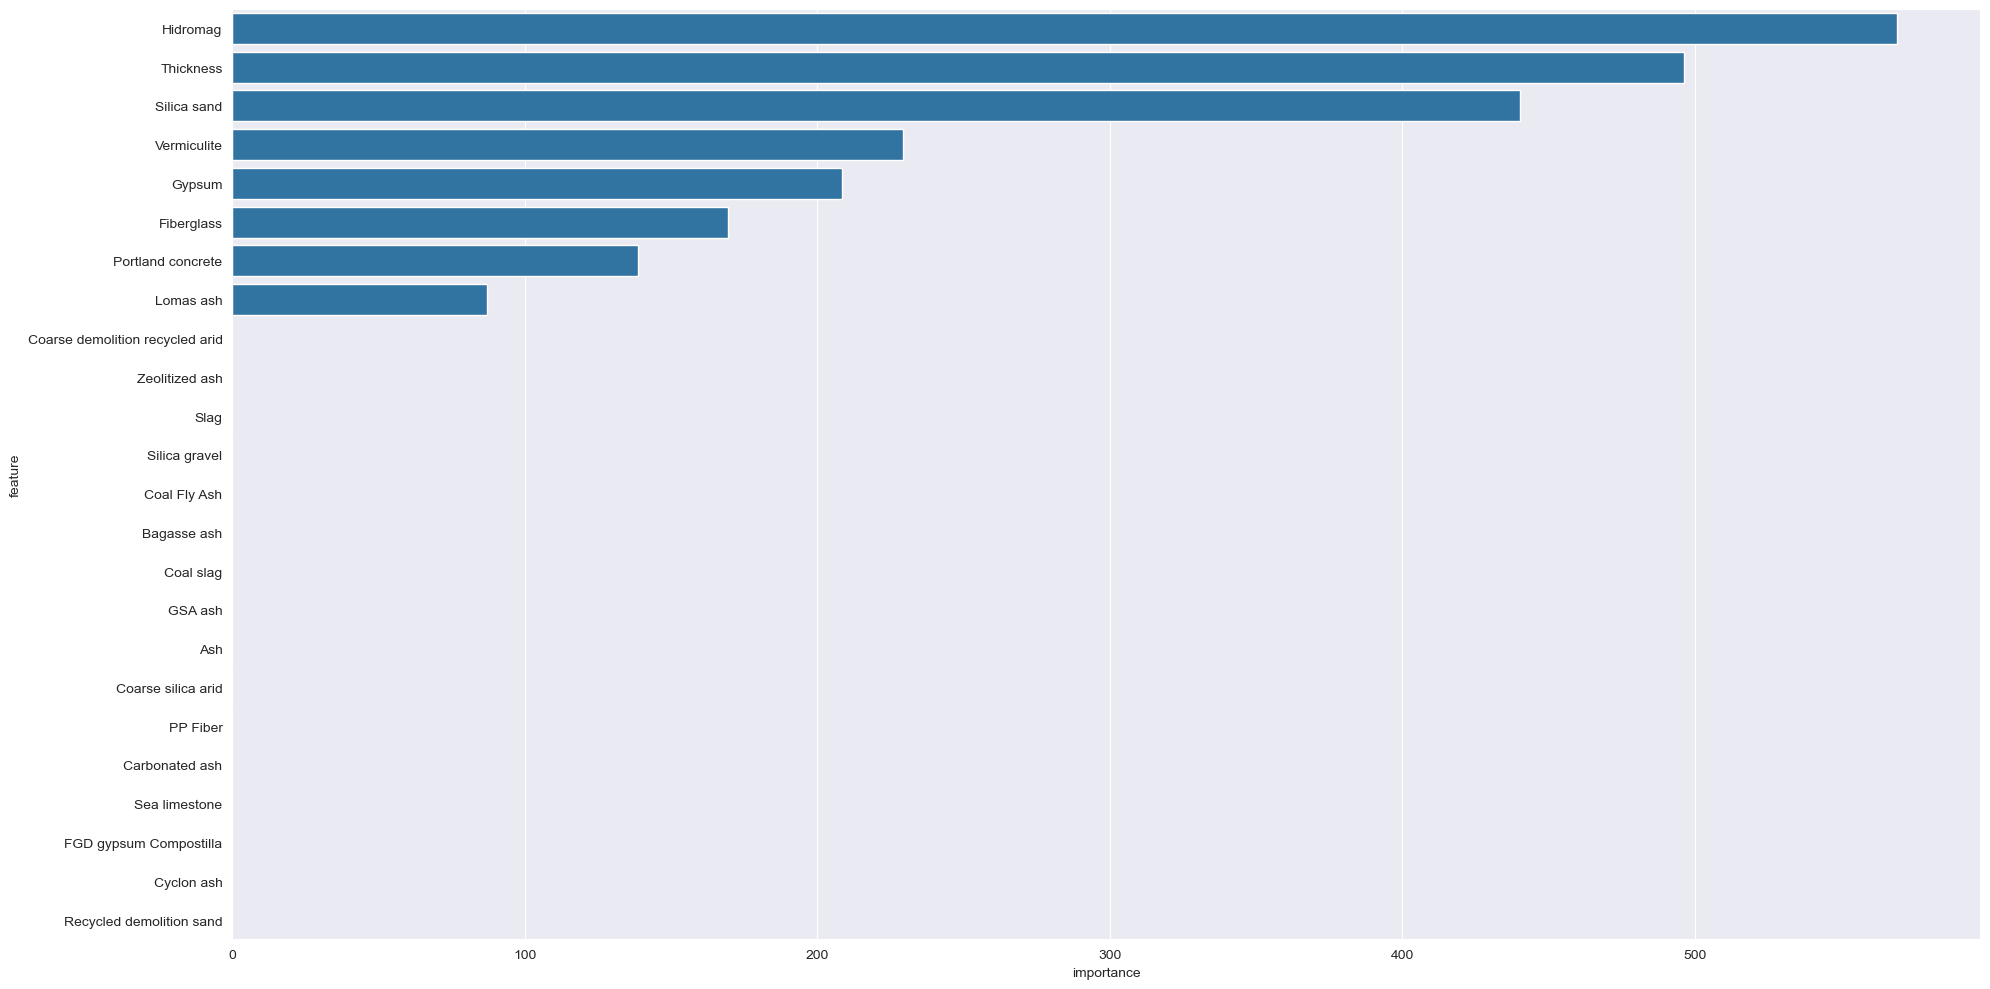

In [39]:
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)

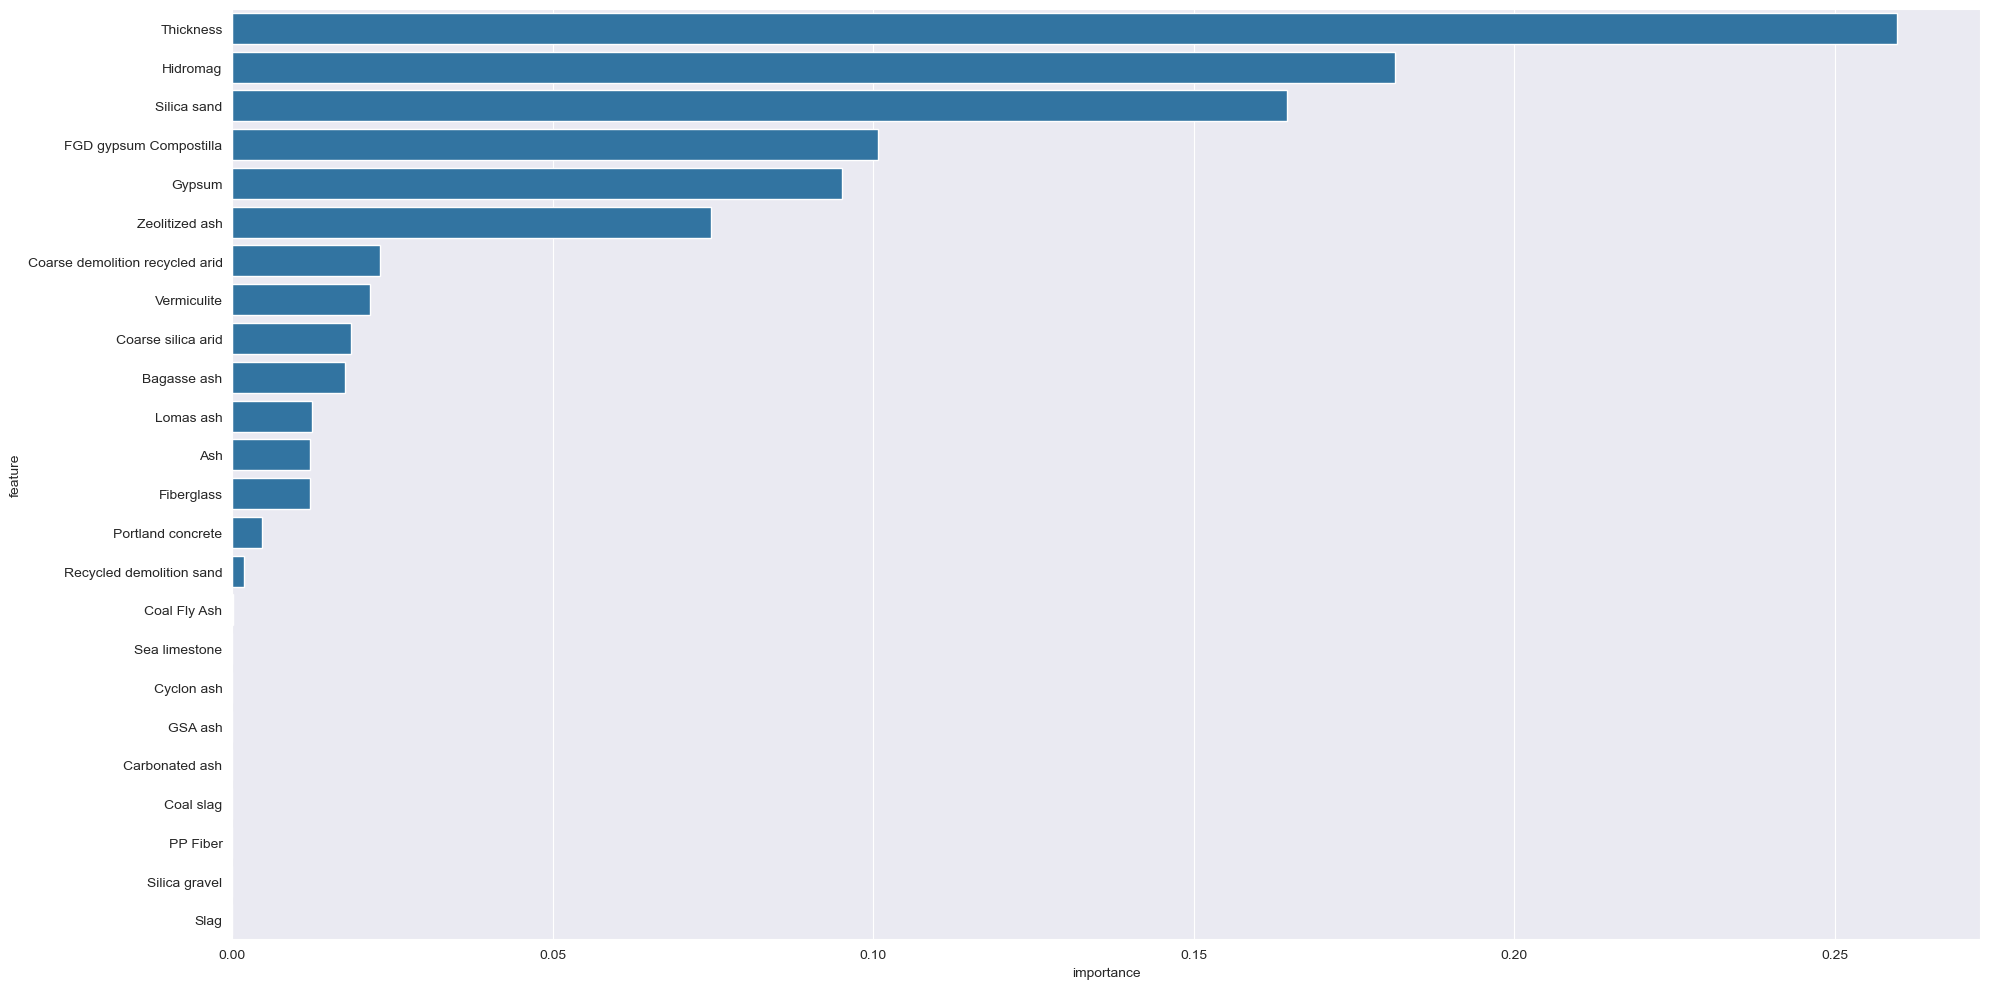

In [40]:
#Train LightGBM model & return importance results as pd.DataFrame 
xgb_importance_df = feat_selector.xgb_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


#Apply RFECV with using LightGBM as the estimator & return importance results as pd.DataFrame 
xgb_hyperparams = {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 400,
                    'num_leaves': 30, 'random_state':24, 'importance_type':'gain'
                   }


In [41]:
#Automated correlation analysis & applying multiple feature selection methods
feat_selector = AutoFeatureSelect(modeling_type='classification',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.99,
                                                            cat_threshold=0.99)

feat_selector.drop_correlated_features()

final_importance_df = feat_selector.apply_feature_selection(selection_methods=['xgb'])

XGBoost Feature Importance is finished


In [42]:
final_importance_df

,feature,xgb_importance
0,Thickness,0.259668
1,Hidromag,0.181315
2,Silica sand,0.164607
3,FGD gypsum Compostilla,0.100812
4,Gypsum,0.095100
5,Zeolitized ash,0.074614
6,Coarse demolition recycled arid,0.023014
7,Vermiculite,0.021505
8,Coarse silica arid,0.018467
9,Bagasse ash,0.017570


In [43]:
def get_feature_lists_by_threshold(df, threshold=0.99):
    accumulated_sum = 0
    include = []
    exclude = []
    
    for index, row in df.iterrows():
        if accumulated_sum + row['xgb_importance'] <= threshold:
            include.append(row['feature'])
            accumulated_sum += row['xgb_importance']
        else:
            exclude.append(row['feature'])
            exclude.extend(df['feature'][index + 1:])
            break
    
    return include, exclude

In [44]:
threshold = 0.999

include, exclude = get_feature_lists_by_threshold(final_importance_df, threshold)

print("Include:", include)
print("Exclude:", exclude)

Include: ['Thickness', 'Hidromag', 'Silica sand', 'FGD gypsum Compostilla', 'Gypsum', 'Zeolitized ash', 'Coarse demolition recycled arid', 'Vermiculite', 'Coarse silica arid', 'Bagasse ash', 'Lomas ash', 'Ash', 'Fiberglass', 'Portland concrete']
Exclude: ['Recycled demolition sand', 'Coal Fly Ash', 'Sea limestone', 'Cyclon ash', 'GSA ash', 'Carbonated ash', 'Coal slag', 'PP Fiber', 'Silica gravel', 'Slag']


In [45]:
df_balanced = df_balanced.drop(columns = exclude)

In [46]:
df_balanced.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,Fireproof cardboard,Rice husk ash,Ash,FGD gypsum Compostilla,Portland concrete,Silica sand,Coarse silica arid,Coarse demolition recycled arid,Bagasse ash,Zeolitized ash,Silica fume,Hidromag,FRR
0,2.0,35.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-30
1,2.0,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
2,1.5,26.0,99.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
3,1.5,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
4,4.0,110.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-90


In [47]:
drop = ['Rice husk ash', 'Silica fume', 'Fireproof cardboard', 't180']

In [48]:
df_balanced = df_balanced.drop(columns = drop)

In [49]:
df_balanced.head()

,Thickness,Gypsum,Lomas ash,Vermiculite,Fiberglass,Ash,FGD gypsum Compostilla,Portland concrete,Silica sand,Coarse silica arid,Coarse demolition recycled arid,Bagasse ash,Zeolitized ash,Hidromag,FRR
0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-30
1,2.0,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
2,1.5,99.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
3,1.5,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-15
4,4.0,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FRR-90


In [50]:
df_balanced.to_excel(path + 'FR_FS_class.xlsx', index=False)